In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
sys.path.insert(0, '/home/llr/cms/wind/cmssw/CMSSW_9_4_2/src/ZZAnalysis/AnalysisStep/test/Python/')

In [4]:
from trainlib.ConfigFileHandler import ConfigFileHandler
from trainlib.ModelCollectionConfigFileHandler import ModelCollectionConfigFileHandler

Welcome to JupyROOT 6.10/09


Using TensorFlow backend.


In [5]:
campaign_dir="/data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/"

In [6]:
bin_dir = {"Untagged": 0,
            "VBF1j": 1,
            "VBF2j": 2,
            "VHhadr": 3}

In [13]:
df = pd.DataFrame()

for subdir in next(os.walk(campaign_dir))[1]:
    if "statistics" not in subdir and "bin" not in subdir:
        punzi_path = campaign_dir + subdir + "/comp/Mor18_punzi_comp.conf"
        settings_path = campaign_dir + subdir + "/settings.conf"
    
        # first, read back the configuration file for this run
        conf = ModelCollectionConfigFileHandler()
        conf.load_configuration(settings_path)
    
        # now select a typical model and read its hyperparameters
        typical_model = conf._get_model_list(conf._get_model_collection_list()[0])[0]
        hyperparams = conf.GetHyperparameters(typical_model)
        hyperparam_dict = {key: [val] for key, val in hyperparams.iteritems()}
            
        # then read in the results in terms of relative Punzi improvement for each category
        conf = ConfigFileHandler()
        conf.load_configuration(punzi_path)
    
        # load the Punzi values for each category
        values = {}
        for category, bin_number in bin_dir.iteritems():
            values[category] = float(conf.get_field("Punzi", category))
        
        # merge the two dictionaries
        values.update(hyperparam_dict)
        df = df.append(pd.DataFrame.from_dict(values))

attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/number_layers_1.0_number_neurons_128.0_extraparams_0/settings.conf
attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/number_layers_1.0_number_neurons_128.0_extraparams_0/comp/Mor18_punzi_comp.conf
attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/number_layers_1.0_number_neurons_256.0_extraparams_0/settings.conf
attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/number_layers_1.0_number_neurons_256.0_extraparams_0/comp/Mor18_punzi_comp.conf
attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_sweep_checkpoint_evaluation/number_layers_1.0_number_neurons_384.0_extraparams_0/settings.conf
attempting to load configuration file from /data_CMS/cms/wind/180330_layer_neurons_s

In [14]:
# all different values of the number of neurons that were used in the sweep
number_neurons = set(df['number_neurons'])

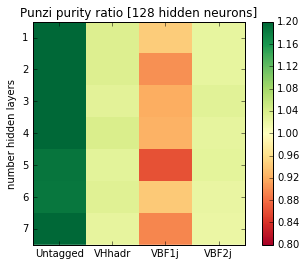

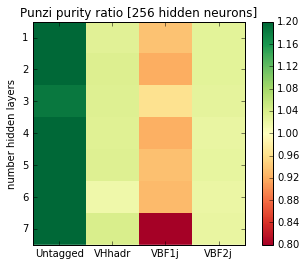

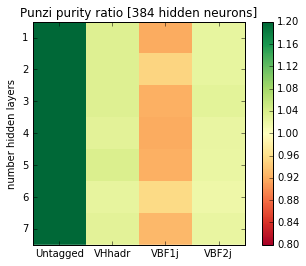

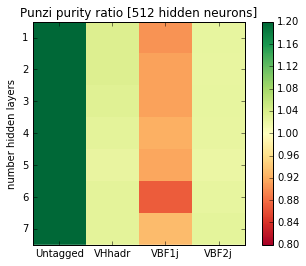

In [15]:
for num in number_neurons:
    number_layers = df.loc[df["number_neurons"] == num, ["number_layers"]].as_matrix().flatten().astype(int)
    punzi_data = df.loc[df["number_neurons"] == num, bin_dir.keys()].as_matrix()
    
    statistics_dir = campaign_dir + "statistics/"
    if not os.path.exists(statistics_dir):
        os.makedirs(statistics_dir)
        
    plt.figure()
    plt.imshow(punzi_data, interpolation = 'none', cmap = 'RdYlGn', aspect = 0.6, vmin = 0.8, vmax = 1.2)
    plt.xticks(range(len(bin_dir)), bin_dir.keys())
    plt.yticks(range(len(number_layers)), number_layers)
    plt.ylabel("number hidden layers")
    plt.colorbar()
    plt.title("Punzi purity ratio [" + str(int(num)) + " hidden neurons]")
    plt.show()
    #plt.savefig(statistics_dir + "punzi_" + str(int(num)) + "_hidden_neurons.pdf")